In [3]:
from keras.datasets import mnist
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))  / 255
train_labels = train_labels.astype('float32')

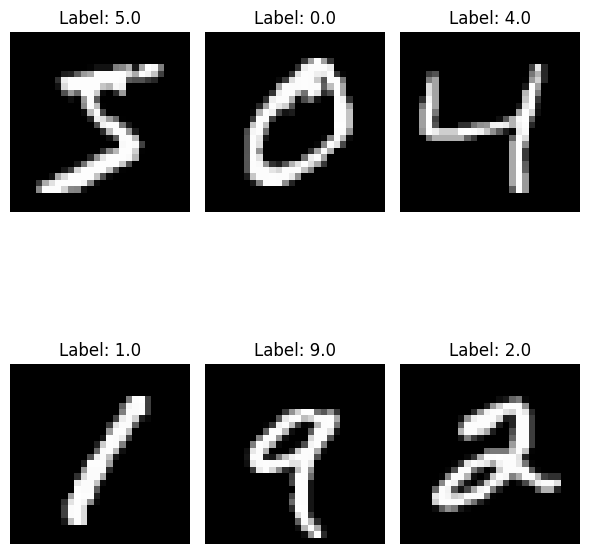

In [2]:
images = train_images[:6].reshape(6, 28, 28)
fig, axes = plt.subplots(2, 3, figsize=(6, 8))
axes = axes.flatten()

for i in range(6):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis('off')

# Adjust layout to make it look clean
plt.tight_layout()
plt.show()



The Singular Value Decomposition (SVD) of a matrix $ A $ is given by:

$$
A = U \Sigma V^T
$$

where:

- $ A $ is an $ m \times n $ matrix.
- $ U $ is an $ m \times m $ orthogonal matrix whose columns are the left singular vectors of $ A $.
- $ \Sigma $ is an $ m \times n $ diagonal matrix whose diagonal entries are the singular values of $ A $, denoted $ \sigma_1, \sigma_2, \dots, \sigma_r $, where $ r = \min(m, n) $.
- $ V $ is an $ n \times n $ orthogonal matrix whose columns are the right singular vectors of $ A $.
- $ V^T $ is the transpose of $ V $.

More explicitly, the SVD can be written as:

$$
A = \begin{bmatrix} 
| & | & \cdots & | \\
\mathbf{u}_1 & \mathbf{u}_2 & \cdots & \mathbf{u}_m \\
| & | & \cdots & |
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 \\
0 & 0 & \ddots & 0 \\
0 & 0 & \cdots & \sigma_r \\
0 & 0 & \cdots & 0
\end{bmatrix}
\begin{bmatrix}
| & | & \cdots & | \\
\mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_n \\
| & | & \cdots & |
\end{bmatrix}^T
$$

where:

- $ \sigma_1, \sigma_2, \dots, \sigma_r $ are the non-zero singular values of $ A $.
- $ \mathbf{u}_i $ are the left singular vectors (columns of $ U $).
- $ \mathbf{v}_i $ are the right singular vectors (columns of $ V $).

The matrices $ U $ and $ V $ are orthogonal, meaning:

$$
U^T U = I_m \quad \text{and} \quad V^T V = I_n
$$

where $ I_m $ and $ I_n $ are the identity matrices of size $ m \times m $ and $ n \times n $, respectively.



(28, 28) (28,) (28, 28)


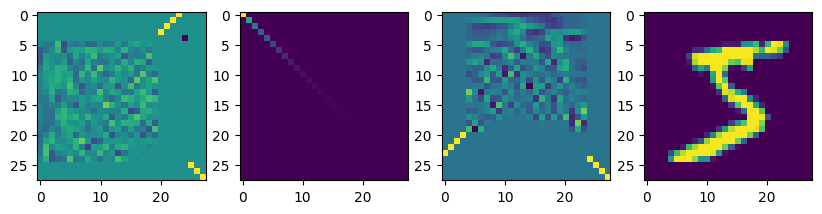

(28, 28) (28,) (28, 28)


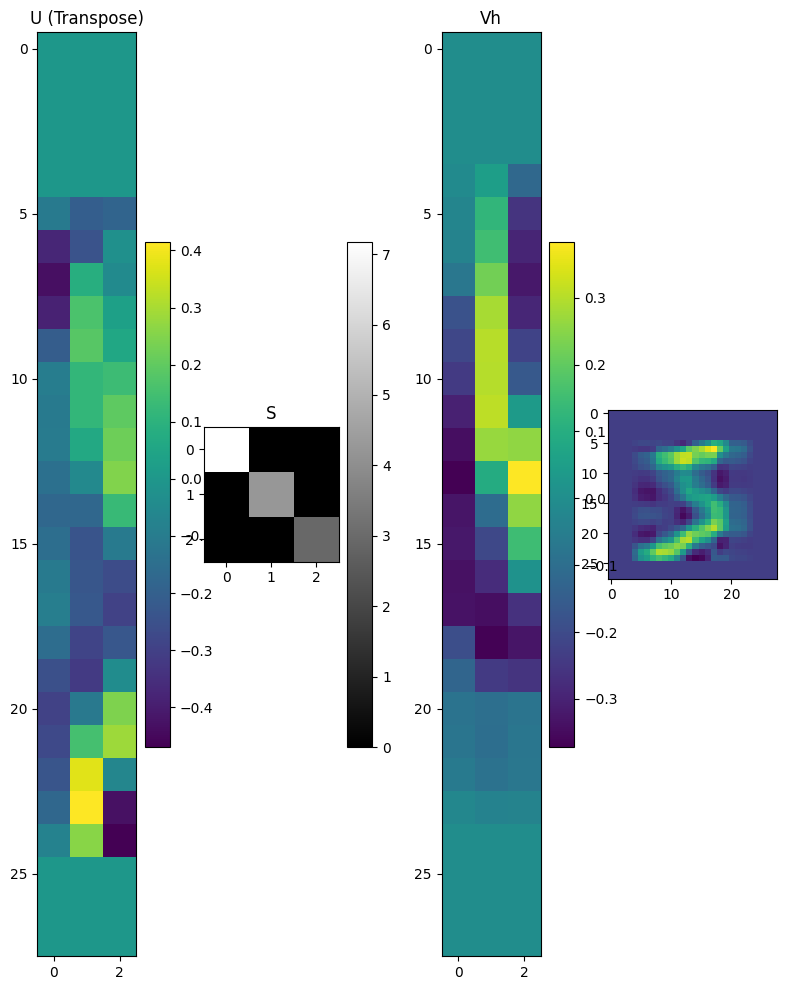

In [ ]:
test_image = train_images[0].reshape((28,28))
U, S, Vh = np.linalg.svd(test_image, full_matrices=True)
print(U.shape, S.shape, Vh.shape)

fig, axes = plt.subplots(1, 4, figsize=(10, 12))

axes[0].imshow(U)
axes[1].imshow(np.diag(S))
axes[2].imshow(Vh)

S_matrix = np.diag(S)  # Convert vector S into a diagonal matrix
recon = np.matmul(U, np.matmul(S_matrix, Vh))

axes[3].imshow(recon)
plt.show()

test_image = train_images[0].reshape((28,28))
U, S, Vh = np.linalg.svd(test_image, full_matrices=True)
print(U.shape, S.shape, Vh.shape)

k = 3

fig, axes = plt.subplots(1, 4, figsize=(10, 12))

# Plot U[:,0:k]
im0 = axes[0].imshow(U[:, 0:k])
axes[0].set_title("U")
fig.colorbar(im0, ax=axes[0], shrink=0.65)

# Plot np.diag(S[0:k])
im1 = axes[1].imshow(np.diag(S[0:k]), 'grey')
axes[1].set_title("S")
fig.colorbar(im1, ax=axes[1], shrink=0.65)

# Plot Vh[0:k,:]
im2 = axes[2].imshow(Vh[0:k, :].transpose())
axes[2].set_title("Vh (Transpose)")
fig.colorbar(im2, ax=axes[2], shrink=0.65)

S_matrix = np.diag(S[0:k])  # Convert vector S into a diagonal matrix
recon = np.matmul(U[:,0:k], np.matmul(S_matrix, Vh[0:k,:]))

axes[3].imshow(recon)
plt.show()




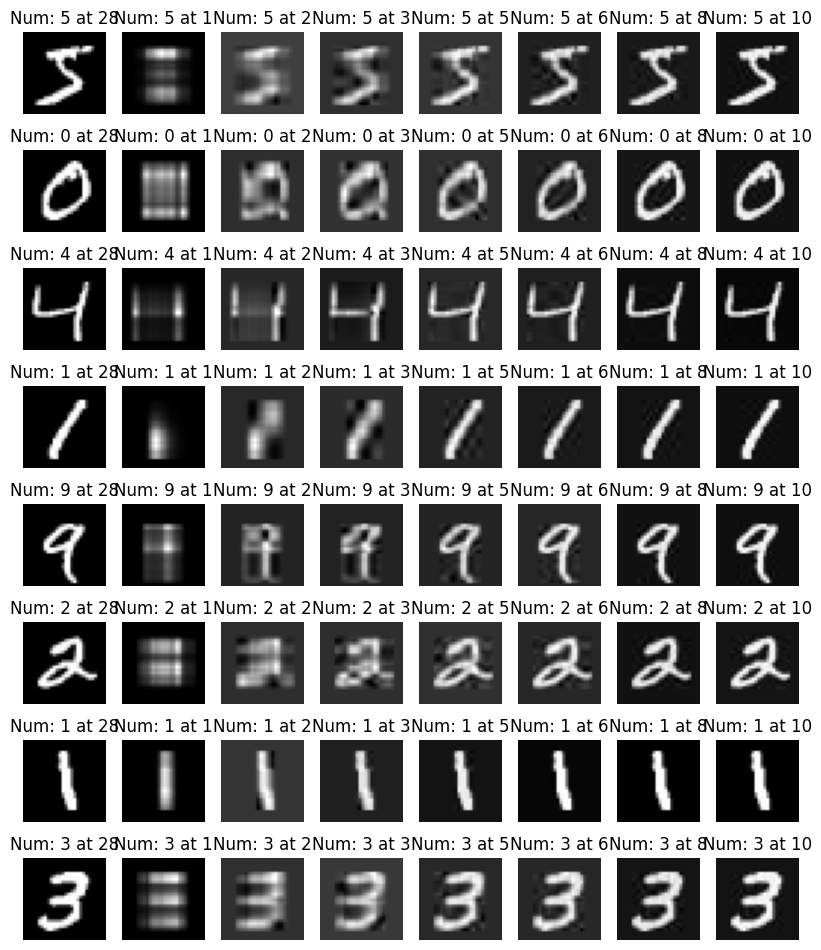

In [4]:
n = 8
steps = [28, 1, 2, 3, 5, 6, 8, 10]
fig, axes = plt.subplots(n, len(steps), figsize=(10, 12))

for i in range(n):
    im = train_images[i].reshape((28,28))
    U, S, Vh = np.linalg.svd(im, full_matrices=True)

    for s, step in enumerate(steps):
        S_matrix = np.diag(S[0:step])
        recon = np.matmul(U[:,0:step], np.matmul(S_matrix, Vh[0:step,:]))
        implot = axes[i, s].imshow(recon, 'grey')
        axes[i, s].set_title(f"Num: {int(train_labels[i])} at {step}")
        axes[i, s].axis('off')

plt.show()

# Graph Example

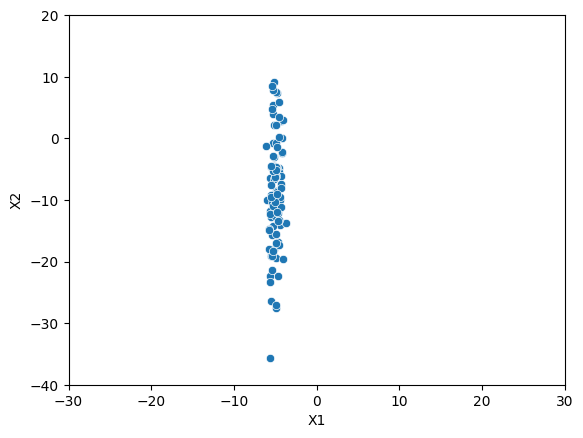

In [73]:
np.random.seed(314)

n = 100
X1 = np.random.normal(-5, 0.5, n)
X2 = np.random.normal(-10, 8, n)
X = np.array([X1, X2])

df = pd.DataFrame({'X1': X1, 'X2': X2})

plt.xlim((-30,30))
plt.ylim((-40,20))
sns.scatterplot(x='X1', y='X2', data=df, marker='o')


# for v in U:

    # plt.arrow(-5, -10, *(30*v))


U, S, Vh = np.linalg.svd(X)
plt.show()

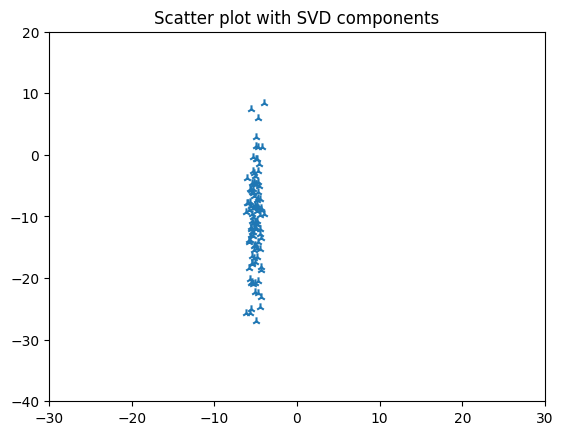

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data
n = 100
X1 = np.random.normal(-5, 0.5, n)
X2 = np.random.normal(-10, 8, n)
X = np.array([X1, X2]).T  # Transpose so X has shape (n, 2)

# Create DataFrame for plotting
df = pd.DataFrame({'X1': X1, 'X2': X2})

# Perform SVD
U, S, Vh = np.linalg.svd(X, full_matrices=True)


# Plot the scatter plot
plt.xlim((-30, 30))
plt.ylim((-40, 20))
# sns.scatterplot(x='X1', y='X2', data=df, marker='o')
plt.scatter(X1, X2, marker='2')

# Plot arrows for the singular vectors
# for i in range(2):
#     # Left singular vector (U[:, i]) - scale by 15 for visibility
#     plt.arrow(0, 0, U[0, i] * 15, U[1, i] * 15, color='r', head_width=2, head_length=3, label=f'U {i+1}')
    
#     # Right singular vector (Vh[i, :]) - scale by 15 for visibility
#     plt.arrow(0, 0, Vh[i, 0] * 15, Vh[i, 1] * 15, color='b', head_width=2, head_length=3, label=f'Vh {i+1}')

# plt.legend()
plt.title('Scatter plot with SVD components')
plt.show()


In [123]:
B = np.zeros((2, 100))
B[:, :2] = np.diag(S)
B[1,1] = 0

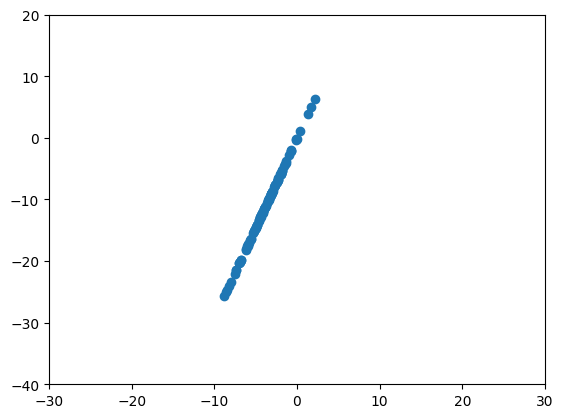

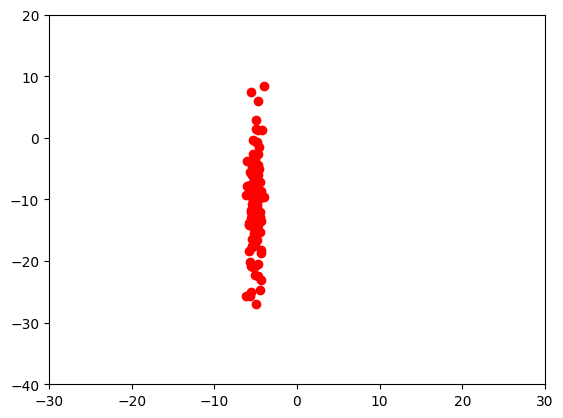

In [125]:
plt.xlim((-30, 30))
plt.ylim((-40, 20))
plt.scatter(*np.dot(np.dot(U, B.T), Vh).T)
plt.show()
plt.xlim((-30, 30))
plt.ylim((-40, 20))
plt.scatter(*X.T, c='red')
plt.show()